In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import lib.io.stan
from lib.preprocess.envelope import *

# Patient AC

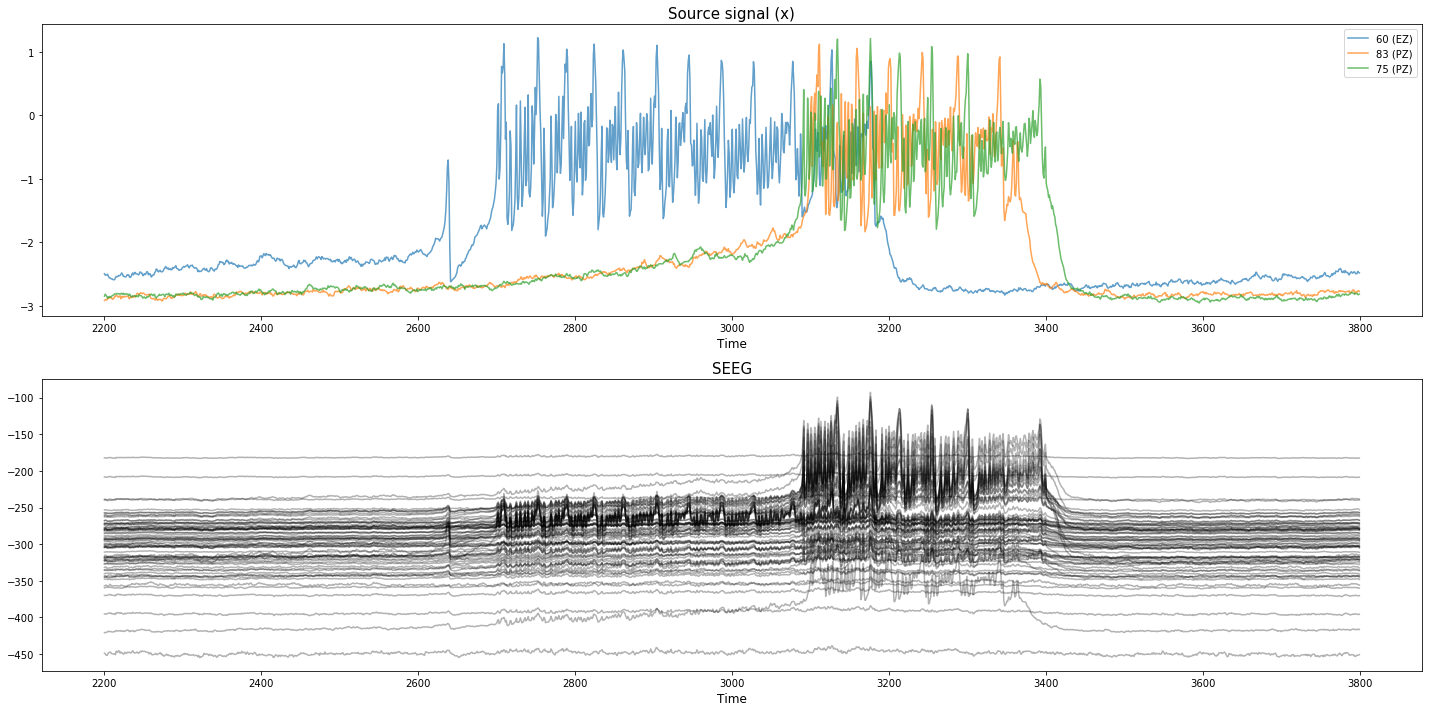

In [2]:
# Load the simulated data
sim_data = np.load('results/exp10/AC_syn_tvb_ez=59_pz=82-74.npz')

# Plot the data and choose window of seizure for fitting
pz_x0 = sim_data['pz_x0']
pz_kplng = sim_data['pz_kplng']
pz = np.append(pz_x0,pz_kplng)
ez = sim_data['ez']
seeg = sim_data['seeg'].T
src_sig = sim_data['src_sig'][:,0,:,0] + sim_data['src_sig'][:,3,:,0]
time_steps = sim_data['time_steps']


start_idx = 2200
end_idx = 3800

plt.figure(figsize=(20,10))
plt.subplot(211)
for roi in ez:
    plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
for roi in pz:
    plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
plt.title("Source signal (x)",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.legend()

plt.subplot(212)
plt.plot(time_steps[start_idx:end_idx], seeg[start_idx:end_idx,:],'k',alpha = 0.3)
plt.title("SEEG",fontsize=15)
plt.xlabel('Time',fontsize=12)

plt.tight_layout()




### Extract features for fitting

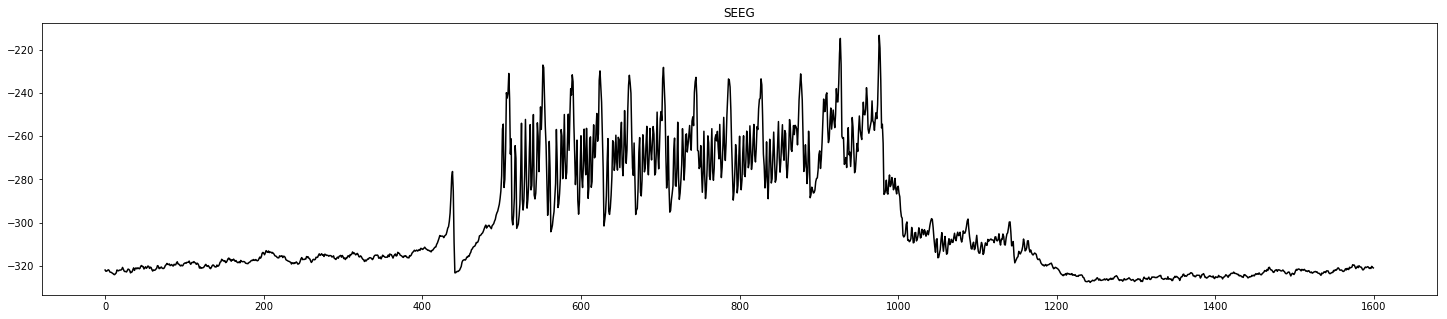

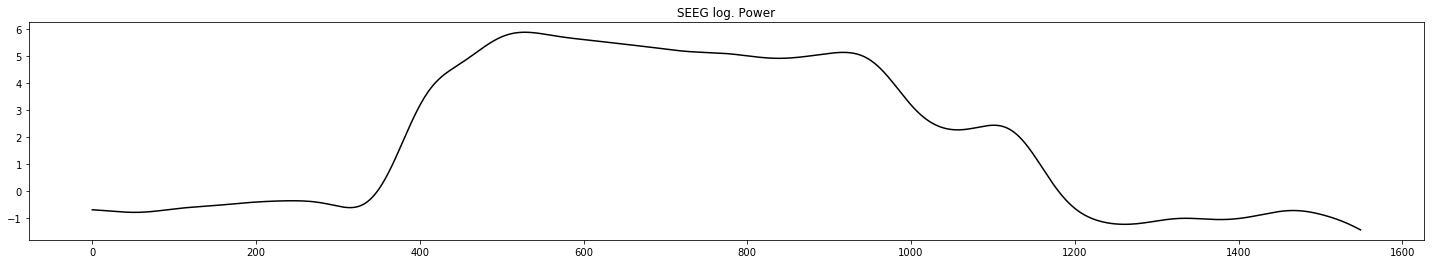

In [3]:
roi = 0
# slice the data for one seizure
seeg_sliced = seeg[start_idx:end_idx,:]
plt.figure(figsize=(25,5))
plt.plot(seeg_sliced[:,roi],'k');
plt.title('SEEG')


seeg_lpwr = compute_fitting_target(seeg[start_idx:end_idx], 256)
np.savez('results/exp10/AC_fit_trgt.npz', fit_trgt = seeg_lpwr)

plt.figure(figsize = (25,4))
plt.plot(seeg_lpwr[:-50,roi],'k')
plt.title('SEEG log. Power')

### Comparison of one channel fitting feature with a 2D epileptor simulation
Note: This is just for comparison sake, simulation parameters can be tuned for a better fit which was what we hope fitting process would do

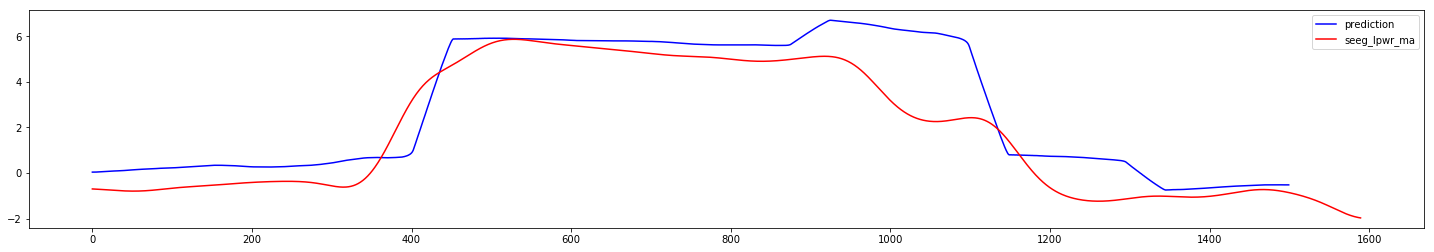

In [4]:
sim_out = lib.io.stan.read_samples('tmp/tmp.csv',0,1,ignore_warmup=True)
x = sim_out['x'][0,...]
z = sim_out['z'][0,...]
t = np.load('results/exp10/AC_network.npz')
gain = t['gain_mat']
seeg_pred = sim_out['mu_seeg_log_power'][0,...]
seeg_pred_ma = mov_avg(seeg_pred, 50)


amplitude = 0.1
offset = 210.0
plt.figure(figsize=(25,4))
plt.plot(amplitude*(seeg_pred_ma[3500:5000,roi]+offset), 'b', label = 'prediction');
plt.plot(seeg_lpwr[:-10,roi], 'r', label='seeg_lpwr_ma')
# plt.plot(seeg_lpwr_f[:,roi], 'k', label = 'seeg_lpwr_f');
plt.legend()

## Patient CJ

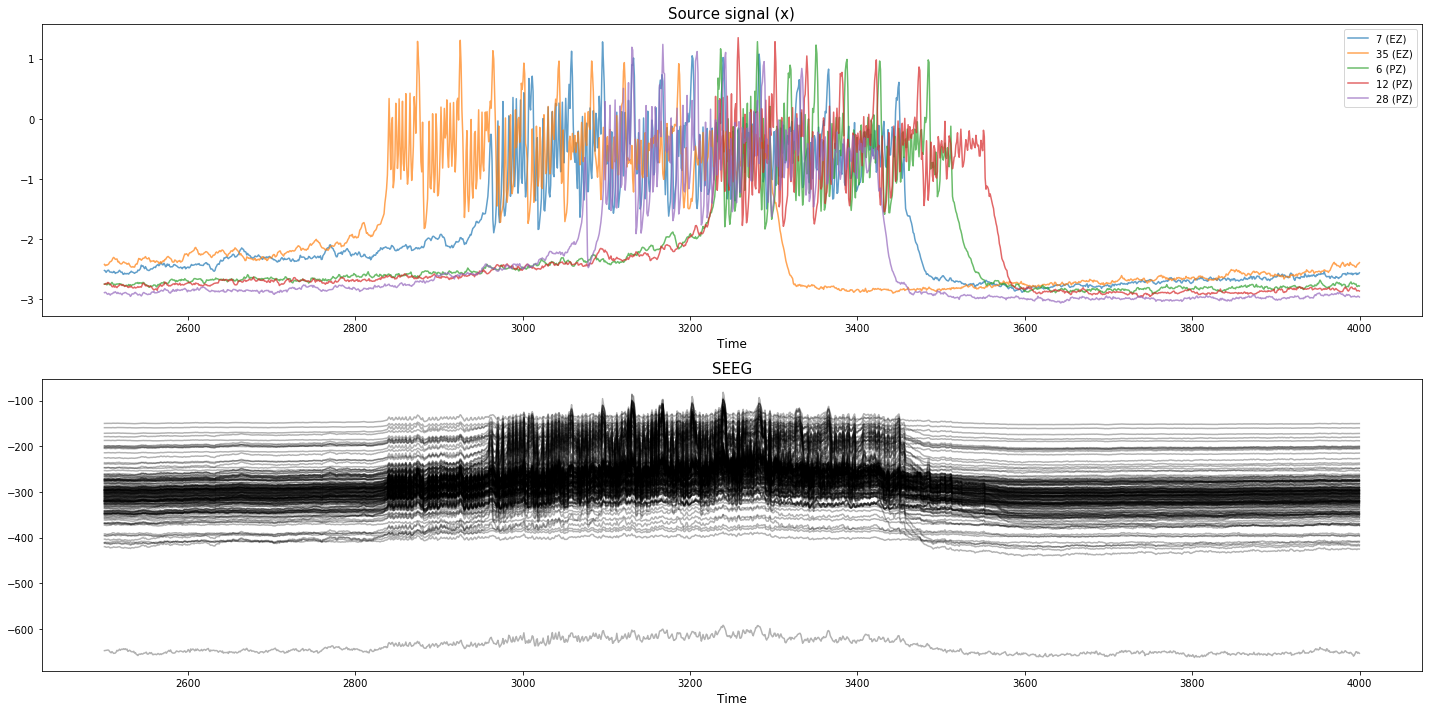

In [5]:
# Load the simulated data
sim_data = np.load('results/exp10/CJ_syn_tvb_ez=6-34_pz=27-5-11.npz')

# Plot the data and choose window of seizure for fitting
pz_x0 = sim_data['pz_x0']
pz_kplng = sim_data['pz_kplng']
pz = np.append(pz_x0,pz_kplng)
ez = sim_data['ez']
seeg = sim_data['seeg'].T
src_sig = sim_data['src_sig'][:,0,:,0] + sim_data['src_sig'][:,3,:,0]
time_steps = sim_data['time_steps']

start_idx = 2500
end_idx = 4000

plt.figure(figsize=(20,10))
plt.subplot(211)
for roi in ez:
    plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (EZ)',alpha=0.7)
for roi in pz:
    plt.plot(time_steps[start_idx:end_idx], src_sig[start_idx:end_idx,roi],label=str(roi+1)+' (PZ)',alpha=0.7)
plt.title("Source signal (x)",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.legend()

plt.subplot(212)
plt.plot(time_steps[start_idx:end_idx], seeg[start_idx:end_idx,:],'k',alpha = 0.3)
plt.title("SEEG",fontsize=15)
plt.xlabel('Time',fontsize=12)
plt.tight_layout()

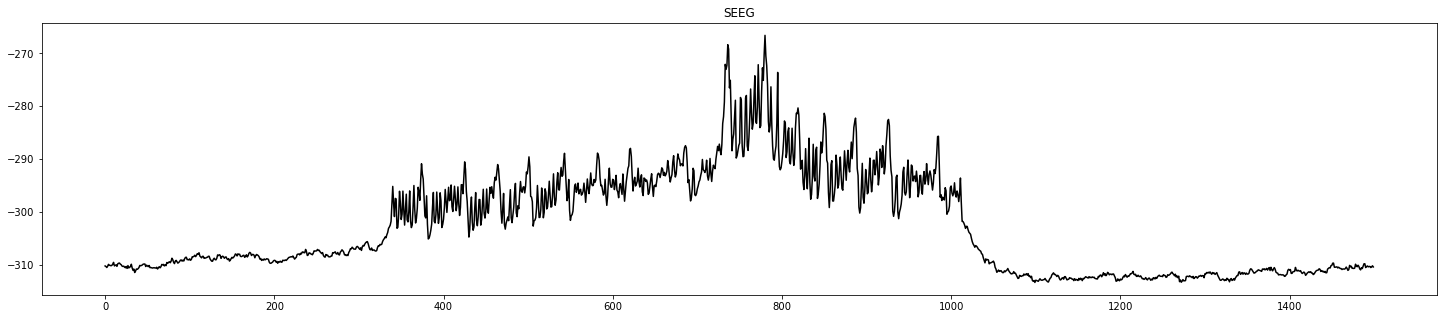

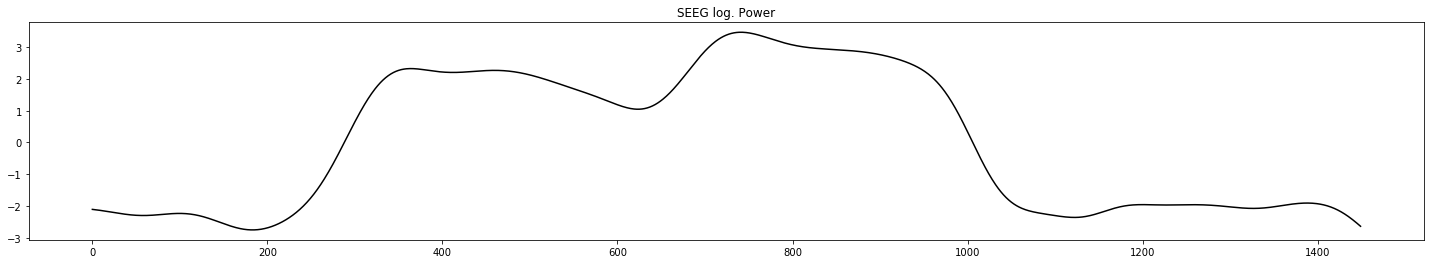

In [6]:
roi = 0
# slice the data for one seizure
seeg_sliced = seeg[start_idx:end_idx,:]
plt.figure(figsize=(25,5))
plt.plot(seeg_sliced[:,roi],'k');
plt.title('SEEG')


seeg_lpwr = compute_fitting_target(seeg[start_idx:end_idx], 256)
np.savez('results/exp10/CJ_fit_trgt.npz', fit_trgt = seeg_lpwr)

plt.figure(figsize = (25,4))
plt.plot(seeg_lpwr[:-50,roi],'k')
plt.title('SEEG log. Power')